## Observations and Insights 

# Summary of the study results:
1.Across the ten drugs in this study, Capomulin and Ramicane yield the best results by effectivly reduceing the tumor volume over the course of 45 days.    

2.There is stong postive correlation between mouse weight and the average tumor volume, it will need further study to determine if weight increase contributes to tumor volume increased and drug effectiveness. 

3.The dataset has mouse age from 2 to 21 months that could be a factor to drug effectiveness, further analysis by age group will help to clarify the impacts.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedData = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combinedData.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [3]:
# Checking the number of mice.
len(combinedData['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedList = combinedData[combinedData.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicatedList

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combinedData= combinedData.set_index('Mouse ID')
cleaned_combinedData= combinedData.drop('g989')

In [6]:
# Checking the number of mice in the clean DataFrame. shoud have 248
len(cleaned_combinedData.index.unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
sortby_drug=cleaned_combinedData.sort_values(['Drug Regimen'],ascending=True).set_index('Drug Regimen')

drug_tumor_mean=sortby_drug.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
drug_tumor_median=sortby_drug.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']

mean_medianDF=pd.merge(drug_tumor_mean,drug_tumor_median,how="outer",on="Drug Regimen")
mean_medianDF=mean_medianDF.rename(columns={'Tumor Volume (mm3)_x':'Mean Tumor Volume',
                                            'Tumor Volume (mm3)_y':'Median Tumor Volume'})

drug_tumor_var=sortby_drug.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
drug_tumor_std=sortby_drug.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
var_stdDF=pd.merge(drug_tumor_var,drug_tumor_std,how="outer",on="Drug Regimen")
var_stdDF=var_stdDF.rename(columns={'Tumor Volume (mm3)_x':'Tumor Volume Variance',
                                    'Tumor Volume (mm3)_y':'Tumor Volume Std. Dev.'})

mean_median_var_stdDF=pd.merge(mean_medianDF,var_stdDF,how="outer",on="Drug Regimen")

drug_tumor_sem=sortby_drug.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_table=pd.merge(mean_median_var_stdDF,drug_tumor_sem,how="outer",on="Drug Regimen")
summary_table=summary_table.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Err.'})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_combinedData.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

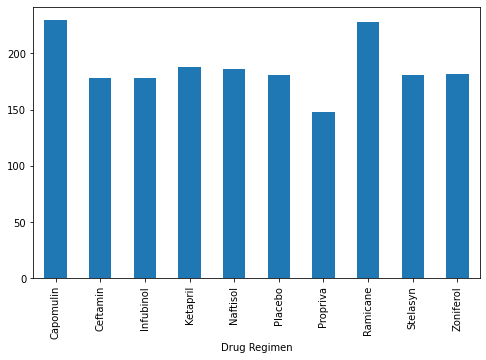

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#value.counts
timepoints_bydrug=sortby_drug.groupby(['Drug Regimen']).count()['Timepoint']
timepoints_bydrug.plot(kind="bar", figsize=(8,5))
plt.show()

In [9]:
drugTimepoints=cleaned_combinedData.groupby(['Drug Regimen']).count()['Timepoint'].reset_index()

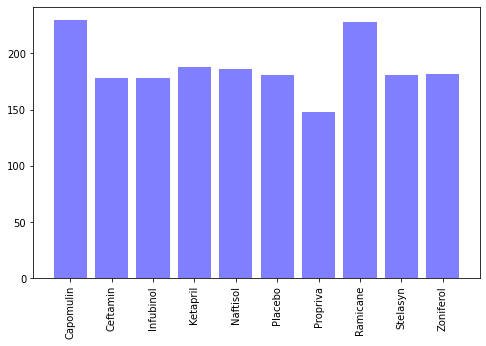

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(drugTimepoints))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))
plt.bar(x_axis, drugTimepoints["Timepoint"], color='blue', alpha=0.5, align="center")
plt.xticks(tick_locations, drugTimepoints["Drug Regimen"], rotation="vertical")
plt.show()

<AxesSubplot:ylabel='Sex'>

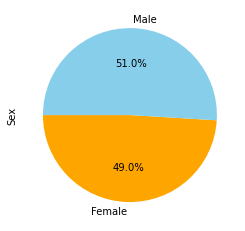

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
femaleVsmale=cleaned_combinedData.reset_index().groupby(['Sex']).count()['Mouse ID'].rename('Sex')

femaleVsmale.plot(kind="pie",autopct="%1.1f%%",colors=['orange','skyblue'],startangle=180)

In [12]:
femaleVsmale.head()

Sex
Female    922
Male      958
Name: Sex, dtype: int64

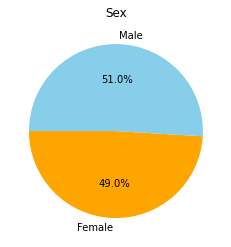

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(femaleVsmale,labels=['Female','Male'],autopct="%1.1f%%",colors=['orange','skyblue'],startangle=180)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#groupby mouse ids, merge to cleaned dataframe

# Start by getting the last (greatest) timepoint for each mouse
sortby_mouseid=cleaned_combinedData.reset_index().sort_values(['Mouse ID'],ascending=True)
sortby_mouseid=sortby_mouseid.groupby(['Mouse ID']).max()['Timepoint']

sortby_mouseid.head()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [36]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data=pd.merge(sortby_mouseid,cleaned_combinedData,how="left",on=["Mouse ID","Timepoint"]).reset_index()
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    tumordata=merged_data.loc[merged_data['Drug Regimen']== drug,'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(tumordata)
    
    #print(tumordata)
   
    # Determine outliers using upper and lower bounds
    quartiles = tumordata.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumordata.loc[(tumordata < lower_bound) | (tumordata  > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


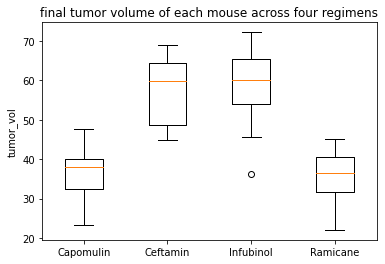

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol=tumor_vol_list
fig1, ax1 = plt.subplots()
ax1.set_title('final tumor volume of each mouse across four regimens')
ax1.set_ylabel('tumor_vol')
ax1.boxplot(tumor_vol,labels=(treatment_list))

plt.show()

## Line and Scatter Plots

In [64]:
dataforplot=cleaned_combinedData.reset_index()
mousewithCapomulin=dataforplot.loc[dataforplot['Mouse ID']== 'b128']
b128withCapomulin=mousewithCapomulin[['Timepoint','Tumor Volume (mm3)']]
b128withCapomulin

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
468,5,45.651331
674,10,43.270852
713,15,43.784893
925,20,42.731552
1257,25,43.262145
1388,30,40.605335
1535,35,37.967644
1616,40,38.379726
1751,45,38.982878


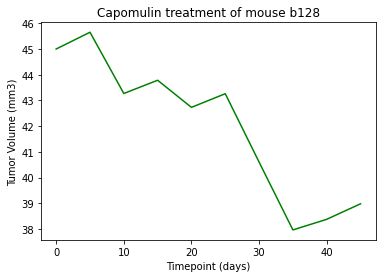

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tumor_volVstime_point = plt.plot(b128withCapomulin['Timepoint'], b128withCapomulin['Tumor Volume (mm3)'], 
                        color="green")
plt.title("Capomulin treatment of mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

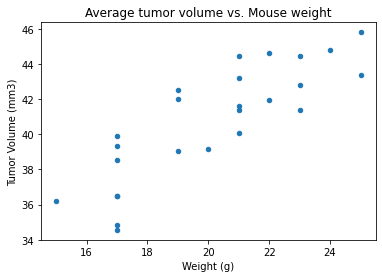

In [92]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
dataforplot.head()
capomulinData=dataforplot.loc[dataforplot['Drug Regimen']=='Capomulin',['Mouse ID','Tumor Volume (mm3)','Weight (g)']]
capomulinData=capomulinData.groupby(['Mouse ID']).mean()

capomulinData.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(6,4),
              title="Average tumor volume vs. Mouse weight")
plt.show()

## Correlation and Regression

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulinData.iloc[:,1]
tumor_volume = capomulinData.iloc[:,0]
correlation = st.pearsonr(weight,tumor_volume) #pearson r will be between -1 and 1
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


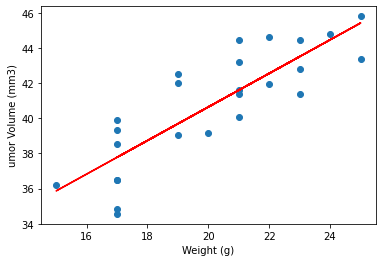

In [89]:
x_values = capomulinData['Weight (g)']
y_values = capomulinData['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('umor Volume (mm3)')
plt.show()